# 深度神经网络拟合函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# initial x-value
X_MAX = 50
x_arr = np.linspace(1, X_MAX, X_MAX).reshape(X_MAX, 1)
x_len = len(x_arr)
print(x_arr.shape)

(50, 1)


In [3]:
# learning parameter
lr = 0.5
MAX_EPISODE = 5

In [4]:
# deep network layer --- 1x4x3x1
NUM_l1 = 1
NUM_l2 = 5
NUM_l3 = 5
NUM_l4 = 1
# define W and b

weight12 = np.matrix(np.random.rand(NUM_l2, NUM_l1))
b1 = np.matrix(np.random.rand(NUM_l2, 1))

weight23 = np.matrix(np.random.rand(NUM_l3, NUM_l2))
b2 = np.matrix(np.random.rand(NUM_l3, 1))

weight34 = np.matrix(np.random.rand(NUM_l4, NUM_l3))
b3 = np.matrix(np.random.rand(NUM_l4, 1))

W_net = [weight12, weight23, weight34]
b_net = [b1, b2, b3]

In [5]:
# define active_function
def fun_act(x):
    y = 1.0 / (1 + np.exp(-x))
    return y

In [6]:
# test network dimension
z1_test = np.matrix(x_arr[1])
z1_test.shape
h2_test = np.matmul(weight12, z1_test)
z2_test = fun_act(np.matmul(weight12, z1_test) + b1)
z3_test = fun_act(np.matmul(weight23, z2_test) + b2)
y_test = np.matmul(weight34, z3_test) + b3
print(y_test.shape)

(1, 1)


In [7]:
def fun_forward(x):
    y = x
    max_len = len(b_net)
    for num, weight in enumerate(W_net):
        # print(weight.shape)
        y = np.matmul(weight, y) + b_net[num]
        # active_function
        if num == (max_len - 1):
            break
        y = fun_act(y)
    return y

In [8]:
# define array to record temp data
y_arr = np.zeros_like(x_arr)
x_env_arr = np.zeros_like(x_arr)

In [9]:
for num, z1 in enumerate(x_arr):
    z1 = np.matrix(z1)

    for j in range(MAX_EPISODE):
        # y_target = fun_forward(z1)
        # forward
        h2 = np.matmul(weight12, z1) + b1
        z2 = fun_act(h2)
        h3 = np.matmul(weight23, z2) + b2
        z3 = fun_act(h3)
        y_target = np.matmul(weight34, z3) + b3
        # x_env = 1.2 * y_target
        x_env = -(X_MAX + 10) / X_MAX ** 2 * (y_target - X_MAX) ** 2 + X_MAX + 10

        loss = 1/2.* (x_env - z1) * (x_env - z1)
        dloss_y = x_env - z1

        
        # pro-backward
        dy_dz3 = weight34
        act_h3 = np.transpose(fun_act(h3))
        dz3_dh3 = np.multiply(act_h3, 1 - act_h3)
        dh3_dz2 = weight23
        act_h2 = np.transpose(fun_act(h2))
        dz2_dh2 = np.multiply(act_h2, 1 - act_h2)
        # dw34
        dloss_dw34 = np.matmul(z3, dloss_y)
        dloss_db3 = dloss_y
        # print(dloss_dw34.shape)
        
        # dw23
        dloss_dh3 = np.multiply(dloss_y * dy_dz3, dz3_dh3)
        dloss_dw23 = np.matmul(z2, dloss_dh3)
        dloss_db2 = dloss_dh3
        
        # dw12 
        dloss_dh2 = np.multiply(np.matmul(dloss_dh3, dh3_dz2), dz2_dh2)
        dloss_dw12 = np.matmul(z1, dloss_dh2)
        dloss_db1 = dloss_dh2
        
        # update the net parameter
        weigh12 = weight12 - lr * np.transpose(dloss_dw12)
        b1 = b1 - lr * np.transpose(dloss_db1)
        
        weight23 = weight23 - lr * np.transpose(dloss_dw23)
        b2 = b2 - lr * np.transpose(dloss_db2)

        weigh34 = weight34 - lr * np.transpose(dloss_dw34)
        b3 = b3 - lr * np.transpose(dloss_db3)
    
    # print(loss)
    y_arr[num] = y_target
    x_env_arr[num] = x_env

In [10]:
%matplotlib inline

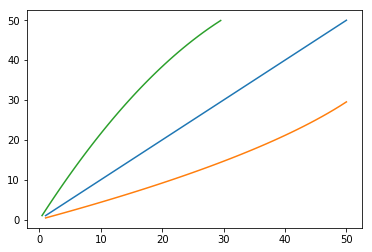

In [11]:
plt.plot(x_arr,x_arr)
plt.plot(x_arr, y_arr)
plt.plot(y_arr, x_env_arr)

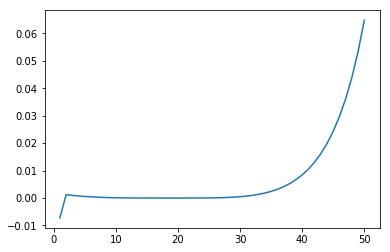

In [12]:
plt.plot(x_arr, x_arr - x_env_arr)

In [13]:
print('weight12:\n', weight12)
print('weight23:\n' ,weight23)
print('weight34:\n', weight34)

weight12:
 [[0.95985641]
 [0.63636358]
 [0.14487239]
 [0.44321065]
 [0.84317406]]
weight23:
 [[0.58988661 0.57093469 1.08286003 0.1665571  0.31593335]
 [1.12188898 0.87561216 0.46648109 0.70244264 0.63736472]
 [0.63037806 0.87894384 0.434128   0.30773589 0.74603851]
 [0.24724135 1.17461928 0.28641502 0.71953187 1.10001264]
 [1.09130115 0.80506705 0.40896367 0.72636713 1.11665894]]
weight34:
 [[0.13662811 0.47640143 0.09453142 0.32567862 0.61672534]]
